In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Charger et prétraiter le dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation des pixels entre 0 et 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Construire le modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplatir l'image en un vecteur
    Dense(128, activation='relu'),  # Couche dense avec 128 neurones
    Dense(10, activation='softmax')  # Couche de sortie pour 10 classes
])

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


2025-01-21 15:06:36.355810: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 15:06:36.360016: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 15:06:36.371909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737471996.391940  570044 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737471996.397750  570044 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-21 15:06:36.419178: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8757 - loss: 0.4312
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9646 - loss: 0.1206
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9757 - loss: 0.0778
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0565
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0431
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0943
Test accuracy: 0.9756


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


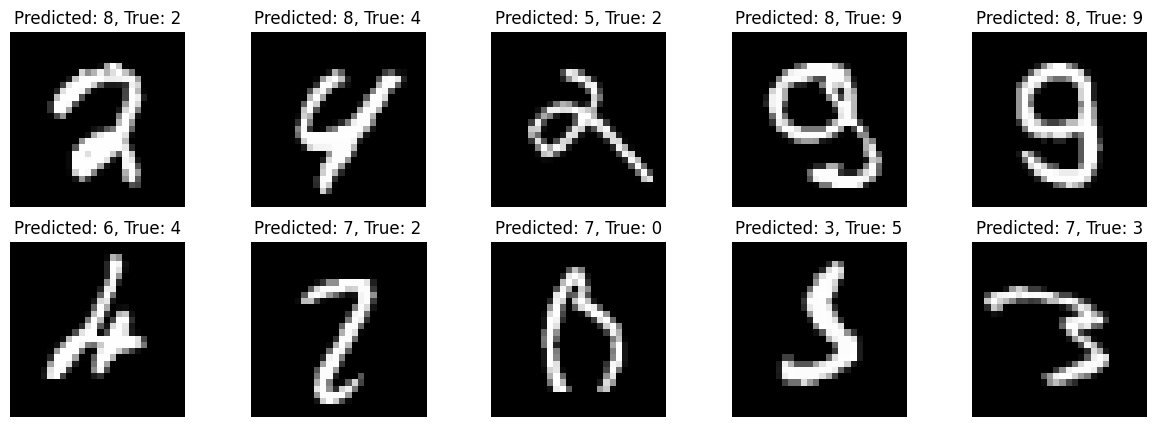

In [2]:
# Get predictions for the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified images
misclassified_indices = np.where(predicted_labels != y_test)[0]

# Plot some misclassified images
num_images_to_plot = 10  # Adjust the number of images to plot

plt.figure(figsize=(15, 5))
for i in range(num_images_to_plot):
    index = misclassified_indices[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[index]}, True: {y_test[index]}")
    plt.axis('off')

plt.show()